### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [11]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("row mean: ", np.mean(m, axis = 1))
print("column mean: ", np.mean(m, axis = 0))
print("overall mean: ", np.mean(m))   

row mean:  [1.5 5.5 9.5]
column mean:  [4. 5. 6. 7.]
overall mean:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [19]:
import numpy as np
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v))
print(np.array([ x*y for x in u for y in v ]).reshape(4,4))
w=u.reshape(4,1)
print(w*v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [17]:
import numpy as np
u = np.random.rand(10, 6)
u[np.any((u < 0.1), axis=1),:] = 0.
print(u)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.12599386 0.17390584 0.45754192 0.91118475 0.62001876 0.548885  ]
 [0.42354948 0.83140271 0.61328017 0.48946626 0.20512155 0.14725215]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.45658603 0.36947065 0.55274539 0.66554867 0.46594343 0.44781535]
 [0.79315012 0.56754021 0.37667801 0.4413686  0.30257645 0.15205516]
 [0.73549107 0.72002735 0.4434449  0.54354922 0.61725773 0.72851781]
 [0.         0.         0.         0.         0.         0.        ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

a = np.linspace(0, 2*np.pi, 100)
print("every 10th：\n",a[::10])
print("after reversing：\n",a[::-1])
mask=(np.abs(np.sin(a)-np.cos(a))<0.1)
b=a[mask]
print("The Extract elements:\n",b)

plt.plot(a, np.sin(a))
plt.plot(a, np.cos(a))

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [65]:
import numpy as np
matrix = np.array([x*y for x in range(1,11) for y in range(1,11)]).reshape(10,10)
print("matrix is\n",matrix)
print("trace is",np.trace(matrix))
print("anti-diagonal is",np.fliplr(matrix).diagonal())
print('after 1 upwards is', np.diagonal(matrix,1))

matrix is
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
trace is 385
anti-diagonal is [10 18 24 28 30 30 28 24 18 10]
after 1 upwards is [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [64]:
a=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
b=np.abs(a[:, np.newaxis] - a[np.newaxis, :])
print(b)
print(b*1.6093)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0.      318.6414  487.6179 1184.4448 1401.7003 1890.9275 2373.7175
  2484.7592 3078.5909 3939.5664]
 [ 318.6414    0.      168.9765  865.8034 1083.0589 1572.2861 2055.0761
  2166.1178 2759.9495 3620.925 ]
 [ 487.6179  168.9765    0.      696.8269  914.0824 1403.3096 1886.0996
  1997.1413 2590.973  3451.9485]
 [1184.4448  865.8034  696.8269    0.      217.2555  706.4827 1189.2727
  1300.3144 1894.1461 2755.1216]
 [1401.7003 1083.0589  914.0824  217.2555    0.  

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [80]:
from math import sqrt

def prime_up_to(n):
    L=  [True]*(n+1)
    for i in range(2,round(sqrt(n))+1):
        if L[i]:    
            e=i*i
            while e<=n:
                L[e]=False  
                e+=i
    return [i for i in range(2,n+1) if L[i]]

n=100
print(prime_up_to(n))

def primes_sieve(n):
    numbers = np.arange(n)
    mask = np.ones(n, dtype = bool)
    mask[:2] = 0

    for i in range(2, int(np.sqrt(n))):
        mask[i+1:] = np.logical_and(mask[i+1:], [numbers[i+1:] % i != 0])
    return numbers[mask]

%timeit (prime_up_to(n))
%timeit (primes_sieve(n))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
13 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
58.8 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

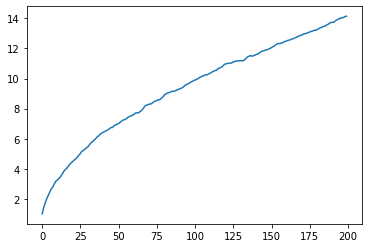

In [79]:
import numpy as np

steps, n_walkers = 200, 1000
walkers = (np.round(np.random.random((n_walkers,steps))).astype(int))*2-1
path= np.cumsum(walkers, axis = 1)
mean_steps = np.average(np.power(path, 2), axis = 0)

import matplotlib.pyplot as plt

plt.plot(np.arange(200), np.sqrt(mean_steps))
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

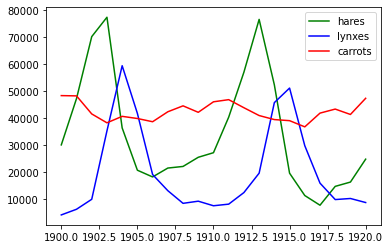

Respectively for hares,lynxes and carrots：
mean: 34080.95238095238 standard deviation: 20897.906458089667
mean: 20166.666666666668 standard deviation: 16254.591536908763
mean: 42400.0 standard deviation: 3322.5062255844787
Correlation between hares and lynxes:  [[1.         0.07189206]
 [0.07189206 1.        ]]
Correlation between carrots and lynxes:  [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
Correlation between hares and carrots:  [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
Highest population each year: 
1900.0 : carrot
1901.0 : carrot
1902.0 : hare
1903.0 : hare
1904.0 : lynx
1905.0 : lynx
1906.0 : carrot
1907.0 : carrot
1908.0 : carrot
1909.0 : carrot
1910.0 : carrot
1911.0 : carrot
1912.0 : hare
1913.0 : hare
1914.0 : hare
1915.0 : lynx
1916.0 : carrot
1917.0 : carrot
1918.0 : carrot
1919.0 : carrot
1920.0 : carrot


In [110]:
#I can not open dropdox on computer even with vpn. So I saved the txt locally.
data = np.loadtxt("populations.txt")
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

import matplotlib.pyplot as plt
plt.plot(years, hares, 'g', label='hares')
plt.plot(years, lynxes, 'b', label='lynxes')
plt.plot(years, carrots, 'r', label='carrots')
plt.legend()
plt.show()

print("Respectively for hares,lynxes and carrots：")
for i in [hares,lynxes,carrots]:
    print("mean:",np.mean(i),"standard deviation:", np.std(i))

a = np.corrcoef(hares, lynxes)
b = np.corrcoef(carrots, lynxes)
c = np.corrcoef(hares, carrots)
print("Correlation between hares and lynxes: " ,a)
print("Correlation between carrots and lynxes: " ,b)
print("Correlation between hares and carrots: " ,c)

print("Highest population each year: ")
for y,c,h,l in zip(list(years),list(carrots), list(hares), list(lynxes)):
    if (c>h and c>l):print (y, ": carrot") 
    if (h>c and h>l):print (y, ": hare")
    if (l>c and l>h):print (y, ": lynx")